# Final Project: Mermin-Peres Magic Square #

In [190]:
from qiskit import *
import pprint
import numpy as np
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram
svbe = BasicAer.get_backend("statevector_simulator")
embe = BasicAer.get_backend("qasm_simulator")
IBMQ.load_account()

/Users/katielund/opt/miniconda3/envs/qiskit_env/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-05-07 01:56:51,573: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [23]:
# Create and return basic quantum circuit with n quantum registers and numancillas ancilla registers
def makecircuit(n, numancillas):
    qc = QuantumCircuit()
    qx = QuantumRegister(n, 'q')
    qc.add_register(qx)
    qa = QuantumRegister(numancillas, 'a')
    cr = ClassicalRegister(numancillas, 'cr')
    qc.add_register(qa)
    qc.add_register(cr)
    return qc

## Optimized Circuits

In [26]:
# Create circuit for optimized row 1
row1 = makecircuit(2,1)
row1.h(row1.qregs[0])
row1.cx(row1.qregs[0][0], row1.qregs[1][0])
row1.cx(row1.qregs[0][1], row1.qregs[1][0])
row1.cx(row1.qregs[0][0], row1.qregs[1][0])
row1.cx(row1.qregs[0][1], row1.qregs[1][0])
row1.measure(row1.qregs[1][0], row1.cregs[0][0])

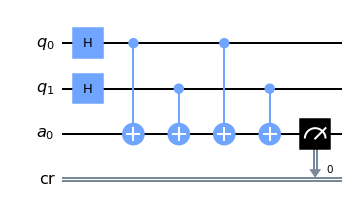

In [186]:
row1.draw(output='mpl')

In [29]:
# Create circuit for optimized row 2
row2 = makecircuit(2,1)
row2.u2(0, np.pi/2, row2.qregs[0][1])
row2.u2(0, np.pi/2, row2.qregs[0][0])
row2.cx(row2.qregs[0][0], row2.qregs[1][0])
row2.cx(row2.qregs[0][1], row2.qregs[1][0])
row2.cx(row2.qregs[0][0], row2.qregs[1][0])
row2.cx(row2.qregs[0][1], row2.qregs[1][0])
row2.measure(row2.qregs[1][0], row2.cregs[0][0])

<ipython-input-29-b9fb77979f62>:2: DeprecationWarning: The QuantumCircuit.u2 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You can use the general 1-qubit gate QuantumCircuit.u instead: u2(φ,λ) = u(π/2, φ, λ). Alternatively, you can decompose it interms of QuantumCircuit.p and QuantumCircuit.sx: u2(φ,λ) = p(π/2+φ) sx p(π/2+λ) (1 pulse on hardware).
  row2.u2(0, np.pi/2, row2.qregs[0][1])


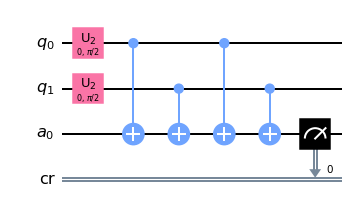

In [31]:
row2.draw(output='mpl')

In [36]:
# Create circuit for optimized row 3
row3 = makecircuit(2,1)
row3.cx(row3.qregs[0][0], row3.qregs[1][0])
row3.cx(row3.qregs[0][1], row3.qregs[1][0])
row3.u2(0, np.pi/2, row3.qregs[0][1])
row3.h(row3.qregs[0][0])
row3.cx(row3.qregs[0][0], row3.qregs[1][0])
row3.cx(row3.qregs[0][1], row3.qregs[1][0])
row3.u2(3*np.pi/2, np.pi/2, row3.qregs[0][1])
row3.u2(np.pi/2, 3*np.pi/2, row3.qregs[0][0])
row3.cx(row3.qregs[0][0], row3.qregs[1][0])
row3.cx(row3.qregs[0][1], row3.qregs[1][0])
row3.measure(row3.qregs[1][0], row3.cregs[0][0])

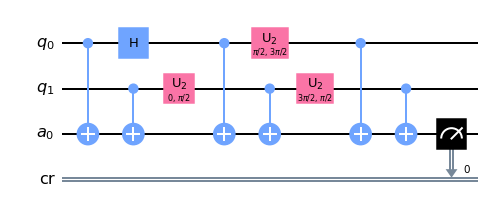

In [37]:
row3.draw(output='mpl')

In [38]:
# Create circuit for optimized column 1
col1 = makecircuit(2,1)
col1.u2(0, np.pi/2, col1.qregs[0][1])
col1.h(col1.qregs[0][0])
col1.cx(col1.qregs[0][0], col1.qregs[1][0])
col1.cx(col1.qregs[0][1], col1.qregs[1][0])
col1.cx(col1.qregs[0][0], col1.qregs[1][0])
col1.cx(col1.qregs[0][1], col1.qregs[1][0])
col1.measure(col1.qregs[1][0], col1.cregs[0][0])

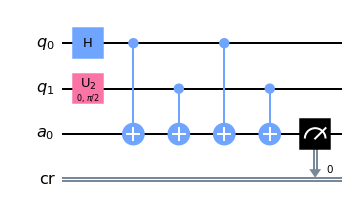

In [39]:
col1.draw(output='mpl')

In [40]:
# Create circuit for optimized column 2
col2 = makecircuit(2,1)
col2.u2(0, np.pi/2, col2.qregs[0][0])
col2.h(col2.qregs[0][1])
col2.cx(col2.qregs[0][0], col2.qregs[1][0])
col2.cx(col2.qregs[0][1], col2.qregs[1][0])
col2.cx(col2.qregs[0][0], col2.qregs[1][0])
col2.cx(col2.qregs[0][1], col2.qregs[1][0])
col2.measure(col2.qregs[1][0], col2.cregs[0][0])

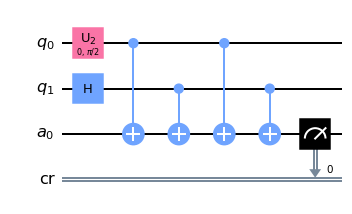

In [41]:
col2.draw(output='mpl')

In [52]:
# Create circuit for optimized column 3
col3 = makecircuit(2,1)
col3.cx(col3.qregs[0][0], col3.qregs[1][0])
col3.h(col3.qregs[0][0])
col3.cx(col3.qregs[0][1], col3.qregs[1][0])
col3.cx(col3.qregs[0][0], col3.qregs[1][0])
col3.u2(np.pi/2, 3*np.pi/2, col3.qregs[0][0])
col3.h(col3.qregs[0][1])
col3.cx(col3.qregs[0][1], col3.qregs[1][0])
col3.cx(col3.qregs[0][0], col3.qregs[1][0])
col3.u2(np.pi/2, 3*np.pi/2, col3.qregs[0][1])
col3.cx(col3.qregs[0][1], col3.qregs[1][0])
col3.measure(col3.qregs[1][0], col3.cregs[0][0])

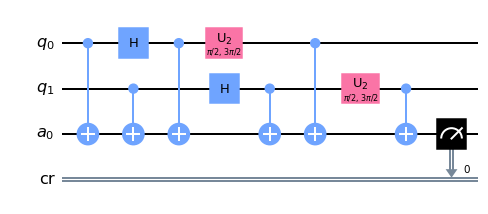

In [43]:
col3.draw(output='mpl')

## Simulate Circuits

In [53]:
# Function to simulate running a job on noise-free qasm simulatior
# Return counts of result of running the job
def sim(qc): 
    job = execute(qc, embe, shots=2000)
    return job.result().get_counts()

In [45]:
sim(row1)

{'0': 2000}

In [46]:
sim(row2)

{'0': 2000}

In [47]:
sim(row3)

{'0': 2000}

In [48]:
sim(col1)

{'0': 2000}

In [49]:
sim(col2)

{'0': 2000}

In [50]:
sim(col3)

{'1': 2000}

## Run Circuits on IBMQ

In [178]:
# Function to run the circuit on a real quantum device
# Returns counts of result of running the job
def run(qc): 
    provider = IBMQ.get_provider(hub='ibm-q')
    ibmqc = provider.get_backend('ibmq_quito')
    job = execute(qc, ibmqc, shots=8192)
    return job.result().get_counts()

In [65]:
run(row1)

{'0': 7603, '1': 589}

In [60]:
run(row2)

{'0': 7768, '1': 424}

In [61]:
run(row3)

{'0': 7574, '1': 618}

In [62]:
run(col1)

{'0': 7701, '1': 491}

In [63]:
run(col2)

{'0': 7797, '1': 395}

In [64]:
run(col3)

{'0': 723, '1': 7469}

## Plot Results

<ipython-input-145-9f6ab950f89a>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


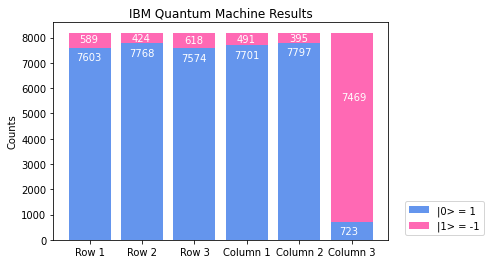

In [145]:
# Create bar plot based on data from real IBM runs
data1 = [7603,7768, 7574, 7701, 7797, 723]
data2 = [589, 424, 618, 491, 395, 7469]
xvals = [1, 2, 3, 8, 9, 10]
labels = ["0", "Row 1", "Row 2", "Row 3", "Column 1", "Column 2", "Column 3"]
fig, ax = plt.subplots()
plt.bar(range(len(data1)), data1, color='cornflowerblue')
plt.bar(range(len(data2)), data2, bottom=data1, color='hotpink')
for i, v in enumerate(data1):
    ax.text(i-0.25, v-500, str(v), 
            color = 'white')
for i, v in enumerate(data2):
    ax.text(i-0.2, 8000-v/3, str(v), 
            color = 'white')
ax.set_xticklabels(labels)
plt.ylabel("Counts")
plt.legend(['|0> = 1', '|1> = -1'], bbox_to_anchor=(1.3, 0.2))
plt.title("IBM Quantum Machine Results")
# plt.show()
plt.savefig('IBMResults.png', bbox_inches='tight')

## Non-Optimized Circuits

In [146]:
# Create circuit for non-optimized row 1 (this is the same as optimized)
row1_nonoptimized = row1

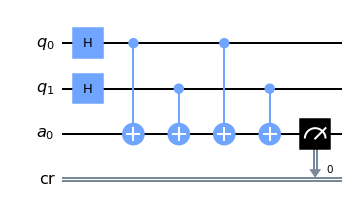

In [149]:
row1_nonoptimized.draw(output='mpl')

In [151]:
# Create circuit for non-optimized row 2
row2_nonoptimized = makecircuit(2,1)
row2_nonoptimized.u3(0, 0, -np.pi/2, row2_nonoptimized.qregs[0][0])
row2_nonoptimized.u3(0, 0, -np.pi/2, row2_nonoptimized.qregs[0][1])
row2_nonoptimized.h(row2_nonoptimized.qregs[0][0])
row2_nonoptimized.h(row2_nonoptimized.qregs[0][1])

row2_nonoptimized.cx(row2_nonoptimized.qregs[0][0], row2_nonoptimized.qregs[1][0])
row2_nonoptimized.cx(row2_nonoptimized.qregs[0][1], row2_nonoptimized.qregs[1][0])
row2_nonoptimized.cx(row2_nonoptimized.qregs[0][0], row2_nonoptimized.qregs[1][0])
row2_nonoptimized.cx(row2_nonoptimized.qregs[0][1], row2_nonoptimized.qregs[1][0])
row2_nonoptimized.measure(row2_nonoptimized.qregs[1][0], row2_nonoptimized.cregs[0][0])

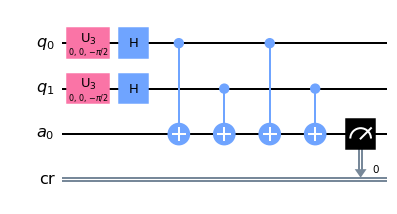

In [152]:
row2_nonoptimized.draw(output='mpl')

In [155]:
# Create circuit for non-optimized row 3
row3_nonoptimized = makecircuit(2,1)
row3_nonoptimized.cx(row3_nonoptimized.qregs[0][0], row3_nonoptimized.qregs[1][0])
row3_nonoptimized.cx(row3_nonoptimized.qregs[0][1], row3_nonoptimized.qregs[1][0])
row3_nonoptimized.u3(0, 0, -np.pi/2, row3_nonoptimized.qregs[0][1])
row3_nonoptimized.h(row3_nonoptimized.qregs[0][0])
row3_nonoptimized.h(row3_nonoptimized.qregs[0][1])
row3_nonoptimized.cx(row3_nonoptimized.qregs[0][0], row3_nonoptimized.qregs[1][0])
row3_nonoptimized.cx(row3_nonoptimized.qregs[0][1], row3_nonoptimized.qregs[1][0])
row3_nonoptimized.h(row3_nonoptimized.qregs[0][1])
row3_nonoptimized.u3(0, 0, np.pi/2, row3_nonoptimized.qregs[0][1])
row3_nonoptimized.h(row3_nonoptimized.qregs[0][0])
row3_nonoptimized.h(row3_nonoptimized.qregs[0][1])
row3_nonoptimized.u3(0, 0, -np.pi/2, row3_nonoptimized.qregs[0][0])
row3_nonoptimized.h(row3_nonoptimized.qregs[0][0])
row3_nonoptimized.cx(row3_nonoptimized.qregs[0][0], row3_nonoptimized.qregs[1][0])
row3_nonoptimized.cx(row3_nonoptimized.qregs[0][1], row3_nonoptimized.qregs[1][0])
row3_nonoptimized.measure(row3_nonoptimized.qregs[1][0], row3_nonoptimized.cregs[0][0])

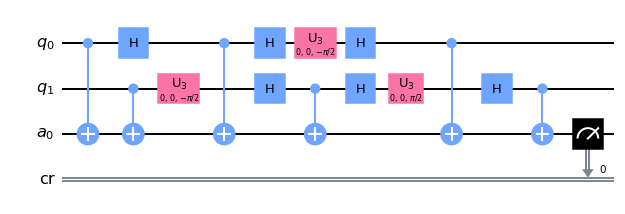

In [156]:
row3_nonoptimized.draw(output='mpl')

In [159]:
# Create circuit for non-optimized column 1
col1_nonoptimized = makecircuit(2,1)
col1_nonoptimized.u3(0, 0, -np.pi/2, col1_nonoptimized.qregs[0][1])
col1_nonoptimized.h(col1_nonoptimized.qregs[0][0])
col1_nonoptimized.h(col1_nonoptimized.qregs[0][1])
col1_nonoptimized.cx(col1_nonoptimized.qregs[0][0], col1_nonoptimized.qregs[1][0])
col1_nonoptimized.cx(col1_nonoptimized.qregs[0][1], col1_nonoptimized.qregs[1][0])
col1_nonoptimized.cx(col1_nonoptimized.qregs[0][0], col1_nonoptimized.qregs[1][0])
col1_nonoptimized.cx(col1_nonoptimized.qregs[0][1], col1_nonoptimized.qregs[1][0])
col1_nonoptimized.measure(col1_nonoptimized.qregs[1][0], col1_nonoptimized.cregs[0][0])

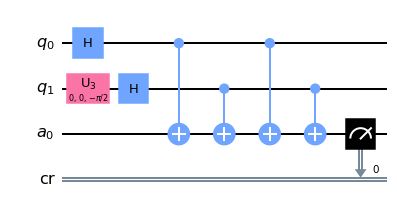

In [160]:
col1_nonoptimized.draw(output='mpl')

In [161]:
# Create circuit for non-optimized column 2
col2_nonoptimized = makecircuit(2,1)
col2_nonoptimized.u3(0, 0, -np.pi/2, col1_nonoptimized.qregs[0][0])
col2_nonoptimized.h(col2_nonoptimized.qregs[0][1])
col2_nonoptimized.h(col2_nonoptimized.qregs[0][0])
col2_nonoptimized.cx(col2_nonoptimized.qregs[0][0], col2_nonoptimized.qregs[1][0])
col2_nonoptimized.cx(col2_nonoptimized.qregs[0][1], col2_nonoptimized.qregs[1][0])
col2_nonoptimized.cx(col2_nonoptimized.qregs[0][0], col2_nonoptimized.qregs[1][0])
col2_nonoptimized.cx(col2_nonoptimized.qregs[0][1], col2_nonoptimized.qregs[1][0])
col2_nonoptimized.measure(col2_nonoptimized.qregs[1][0], col2_nonoptimized.cregs[0][0])

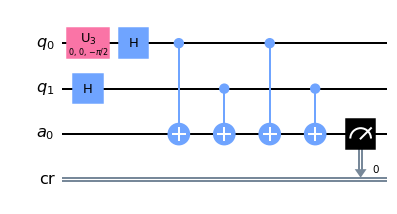

In [162]:
col2_nonoptimized.draw(output='mpl')

In [165]:
# Create circuit for non-optimized column 3
col3_nonoptimized = makecircuit(2,1)
col3_nonoptimized.cx(col3_nonoptimized.qregs[0][0], col3_nonoptimized.qregs[1][0])
col3_nonoptimized.h(col3_nonoptimized.qregs[0][0])
col3_nonoptimized.cx(col3_nonoptimized.qregs[0][1], col3_nonoptimized.qregs[1][0])
col3_nonoptimized.cx(col3_nonoptimized.qregs[0][0], col3_nonoptimized.qregs[1][0])
col3_nonoptimized.h(col3_nonoptimized.qregs[0][0])
col3_nonoptimized.u3(0, 0, -np.pi/2, col3_nonoptimized.qregs[0][0])
col3_nonoptimized.h(col3_nonoptimized.qregs[0][0])
col3_nonoptimized.h(col3_nonoptimized.qregs[0][1])
col3_nonoptimized.cx(col3_nonoptimized.qregs[0][1], col3_nonoptimized.qregs[1][0])
col3_nonoptimized.cx(col3_nonoptimized.qregs[0][0], col3_nonoptimized.qregs[1][0])
col3_nonoptimized.h(col3_nonoptimized.qregs[0][1])
col3_nonoptimized.u3(0, 0, -np.pi/2, col3_nonoptimized.qregs[0][1])
col3_nonoptimized.h(col3_nonoptimized.qregs[0][1])
col3_nonoptimized.cx(col3_nonoptimized.qregs[0][1], col3_nonoptimized.qregs[1][0])
col3_nonoptimized.measure(col3_nonoptimized.qregs[1][0], col3_nonoptimized.cregs[0][0])

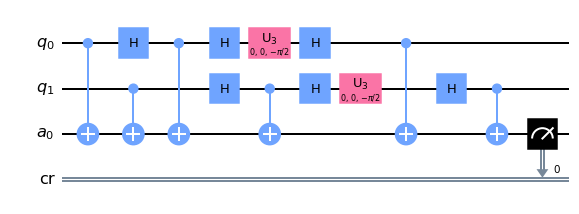

In [166]:
col3_nonoptimized.draw(output='mpl')

## Simulate Non-Optimized Circuits

In [169]:
sim(row1_nonoptimized)

{'0': 2000}

In [170]:
sim(row2_nonoptimized)

{'0': 2000}

In [171]:
sim(row3_nonoptimized)

{'0': 2000}

In [172]:
sim(col1_nonoptimized)

{'0': 2000}

In [173]:
sim(col2_nonoptimized)

{'0': 2000}

In [174]:
sim(col3_nonoptimized)

{'1': 2000}

## Run Non-Optimized Circuits on IBMQ

In [179]:
run(row1_nonoptimized)

{'0': 7469, '1': 723}

In [180]:
run(row2_nonoptimized)

{'0': 7680, '1': 512}

In [181]:
run(row3_nonoptimized)

{'0': 7381, '1': 811}

In [182]:
run(col1_nonoptimized)

{'0': 7435, '1': 757}

In [183]:
run(col2_nonoptimized)

{'0': 7632, '1': 560}

In [184]:
run(col3_nonoptimized)

{'0': 987, '1': 7205}

## Plot Results

<ipython-input-189-363cb0fd70bd>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


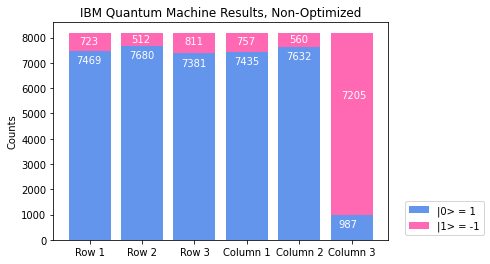

In [189]:
# Create bar chart based on actual IBM results
data_no1 = [7469,7680, 7381, 7435, 7632, 987]
data_no2 = [723, 512, 811, 757, 560, 7205]
xvals = [1, 2, 3, 8, 9, 10]
labels = ["0", "Row 1", "Row 2", "Row 3", "Column 1", "Column 2", "Column 3"]
fig, ax = plt.subplots()
plt.bar(range(len(data_no1)), data_no1, color='cornflowerblue')
plt.bar(range(len(data_no2)), data_no2, bottom=data_no1, color='hotpink')
for i, v in enumerate(data_no1):
    ax.text(i-0.25, v-500, str(v), 
            color = 'white')
for i, v in enumerate(data_no2):
    ax.text(i-0.2, 8000-v/3, str(v), 
            color = 'white')
ax.set_xticklabels(labels)
plt.ylabel("Counts")
plt.legend(['|0> = 1', '|1> = -1'], bbox_to_anchor=(1.3, 0.2))
plt.title("IBM Quantum Machine Results, Non-Optimized")
# plt.show()
plt.savefig('IBMResultsNO.png', bbox_inches='tight')